In [1]:
from gan_synthesis import read, show_all_slices, overlay_mask, count_tumor_pixels, iter_slices
import numpy as np


In [2]:
contrast = read(50, 'contrast')
seg = read(50, 'seg')

In [ ]:
def find_max_tumor_slice(volume):
    """
    Finds the index of the slice (along the z-axis) with the most tumor pixels.

    Parameters:
        volume (ndarray): 3D segmentation volume.

    Returns:
        int: Index of the slice with the highest tumor pixel count.
    """
    max_index = 0
    max_count = 0

    for depth, seg_slice in enumerate(iter_slices(volume)):
        count = count_tumor_pixels(seg_slice)
        if count > max_count:
            max_index = depth
            max_count = count

    return max_index


(58, np.int64(2231))

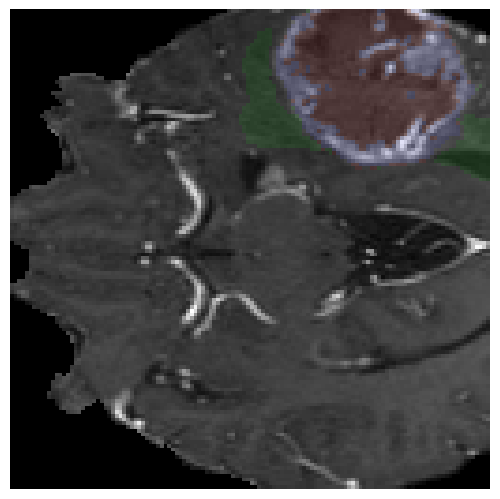

In [10]:
overlay_mask(contrast[:,:,58], seg[:,:,58], alpha=0.3)

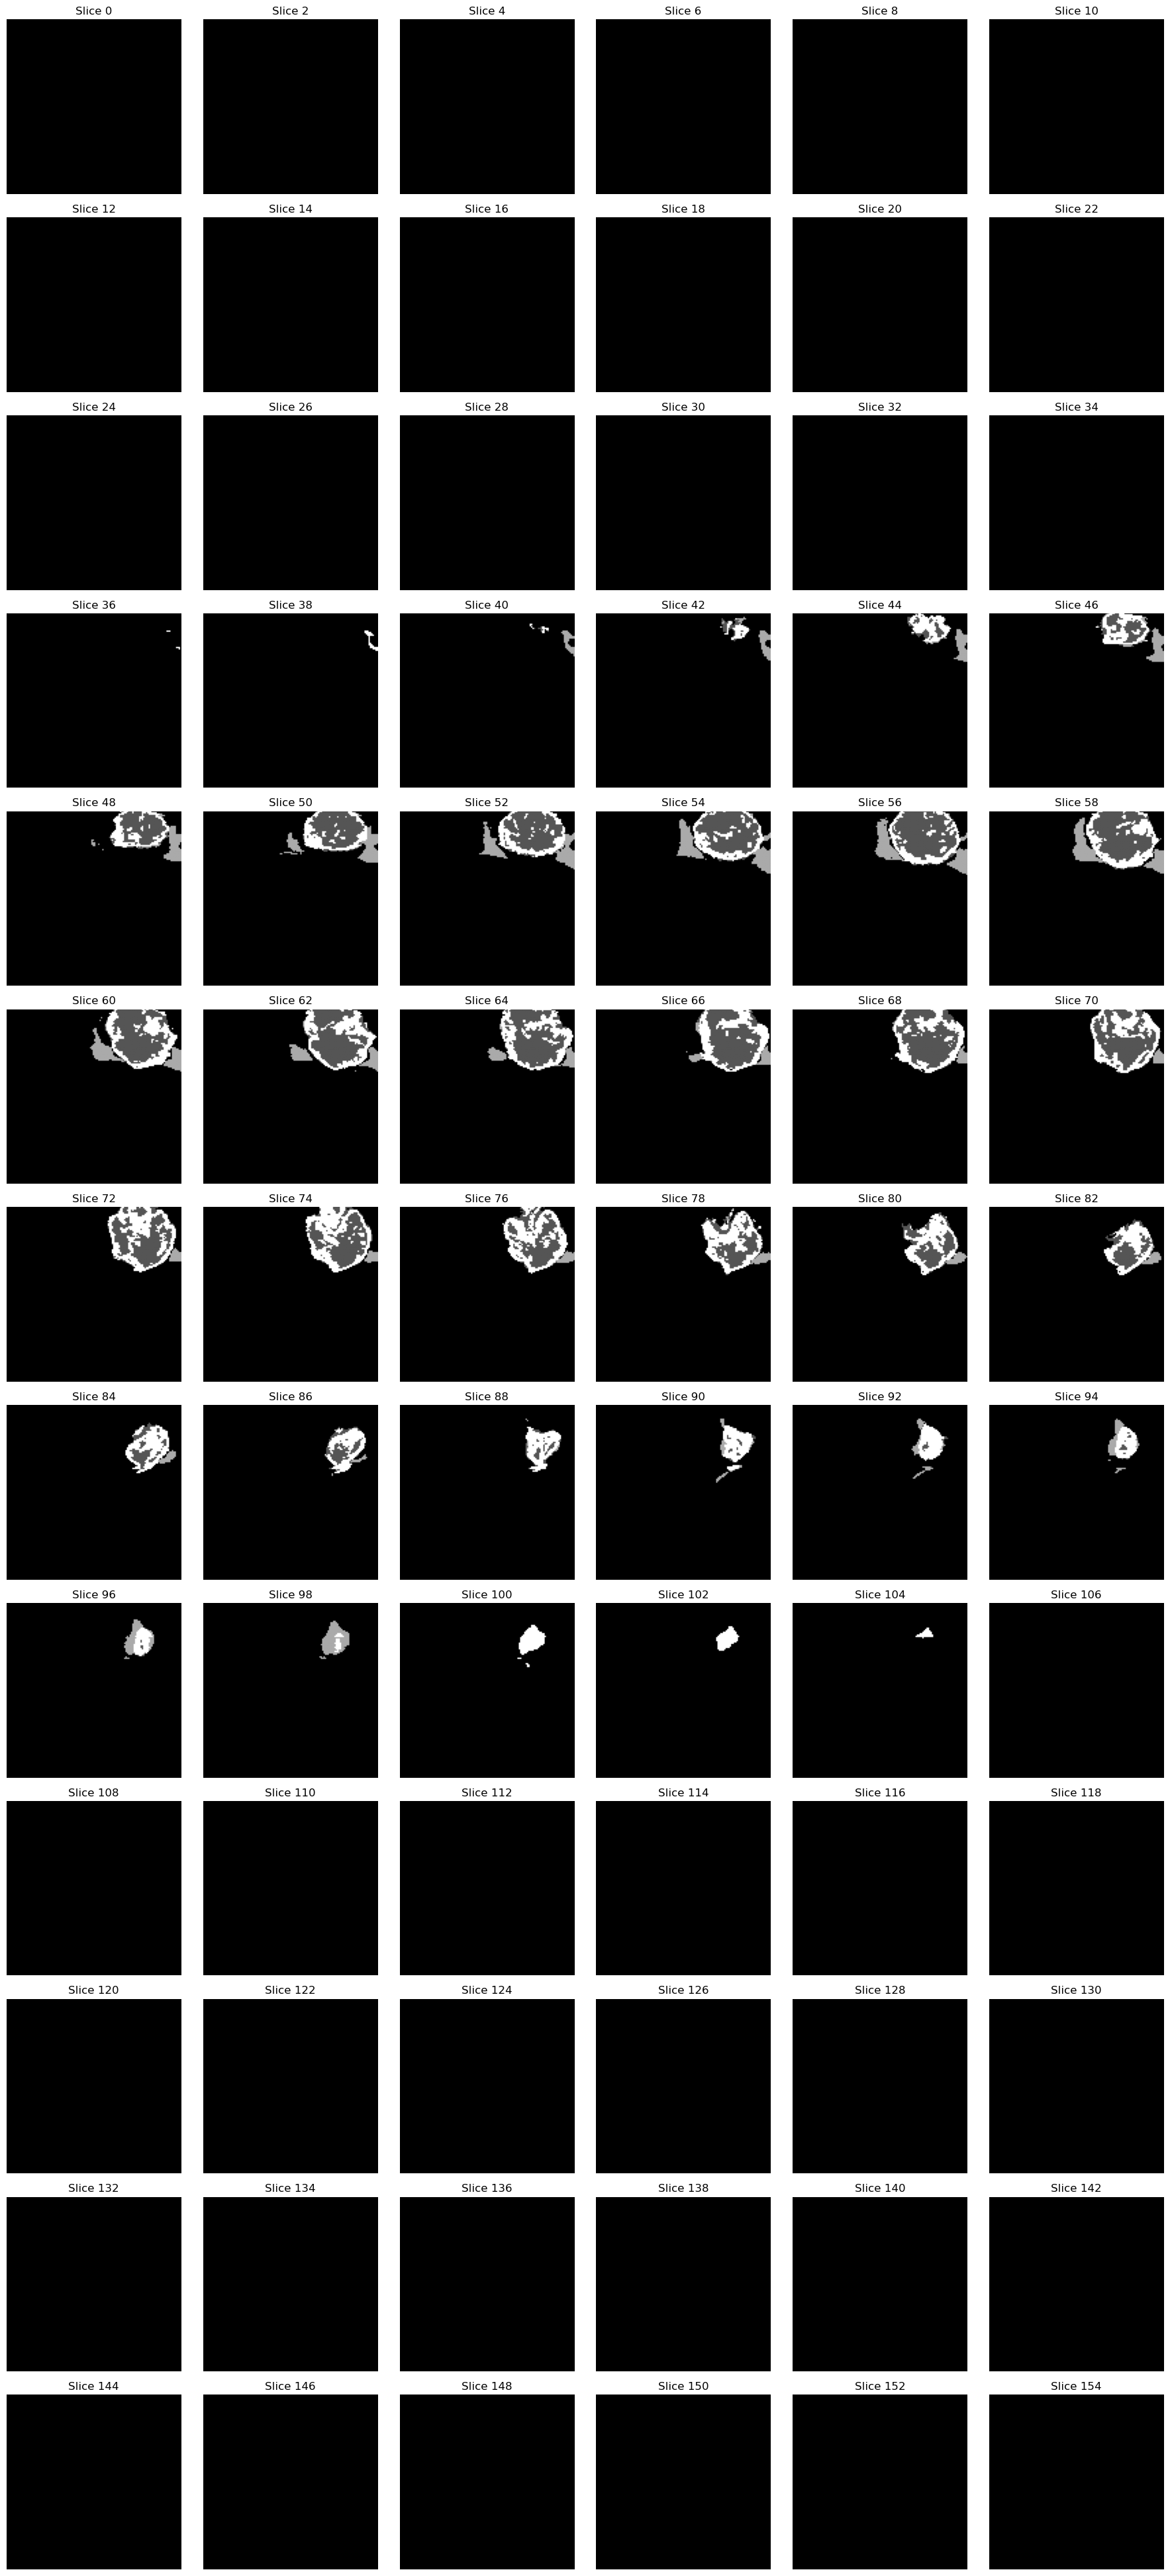

In [5]:
show_all_slices(seg, step=2)

In [6]:
def count_tumor_pixels(seg_slice):
    _, counts = np.unique(seg_slice, return_counts=True)
    return sum(counts[1:])